<a href="https://colab.research.google.com/github/Rishapriakanth/Machine-learning-analysis/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/df_file'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,5]

In [3]:
df=pd.read_csv('/content/df_file.csv')
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [5]:
df.shape

(2225, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [7]:
df['Text'] = df['Text'].apply(lambda x:x.replace('\n',''))
df.head()

,Text,Label
0,Budget to set scene for election Gordon Brown...,0
1,Army chiefs in regiments decision Military ch...,0
2,Howard denies split over ID cards Michael How...,0
3,Observers to monitor UK election Ministers wi...,0
4,Kilroy names election seat target Ex-chat sho...,0


In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
def preprocessing_text(text):
    text= text.lower()
    text = text.split()
    text = ' '.join(text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text= re.sub(r'\s+', ' ', text)
    return text

In [10]:
preprocessing_text(df['Text'][0])

'budget to set scene for election gordon brown will seek to put the economy at the centre of labours bid for a third term in power when he delivers his ninth budget at gmt he is expected to stress the importance of continued economic stability with low unemployment and interest rates the chancellor is expected to freeze petrol duty and raise the stamp duty threshold from â but the conservatives and lib dems insist voters face higher taxes and more meanstesting under labour treasury officials have said there will not be a preelection giveaway but mr brown is thought to have about âbn to spare increase in the stamp duty threshold from â a freeze on petrol duty an extension of tax credit scheme for poorer families possible help for pensioners the stamp duty threshold rise is intended to help first time buyers a likely theme of all three of the main parties general election manifestos ten years ago buyers had a much greater chance of avoiding stamp duty with close to half a million propert

In [11]:
df['Text'] = df['Text'].apply(lambda x:preprocessing_text(x))
df.head()

,Text,Label
0,budget to set scene for election gordon brown ...,0
1,army chiefs in regiments decision military chi...,0
2,howard denies split over id cards michael howa...,0
3,observers to monitor uk election ministers wil...,0
4,kilroy names election seat target exchat show ...,0


In [12]:
tf = TfidfVectorizer()
tf

TfidfVectorizer()

In [14]:
vector=tf.fit_transform(df['Text']).toarray()
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(vector,df['Label'],test_size=0.30)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=70,max_features='sqrt')

In [15]:
rf_model = rf.fit(xtrain,ytrain)
rf_model

RandomForestClassifier(n_estimators=70)

In [17]:
y_pred = rf_model.predict(xtest)
y_pred

array([3, 1, 0, 1, 2, 0, 1, 3, 3, 1, 0, 1, 4, 2, 4, 2, 2, 3, 2, 4, 4, 3,
       4, 2, 0, 4, 3, 0, 0, 0, 2, 1, 1, 4, 3, 1, 1, 4, 2, 1, 3, 1, 1, 4,
       4, 4, 4, 0, 4, 4, 4, 3, 1, 2, 1, 3, 2, 3, 1, 3, 1, 1, 4, 0, 4, 3,
       3, 4, 2, 1, 3, 0, 3, 0, 0, 1, 2, 0, 2, 3, 4, 0, 1, 1, 2, 4, 0, 4,
       4, 3, 0, 2, 1, 1, 3, 4, 4, 2, 0, 1, 2, 4, 2, 4, 2, 2, 1, 0, 2, 0,
       0, 4, 0, 0, 2, 4, 1, 2, 1, 4, 1, 3, 4, 3, 1, 3, 0, 1, 2, 1, 3, 2,
       3, 4, 4, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 3, 4, 4, 2, 4, 0, 2, 0, 1,
       4, 1, 1, 4, 3, 1, 3, 0, 4, 4, 1, 1, 4, 4, 4, 4, 1, 4, 4, 2, 0, 0,
       0, 1, 1, 4, 1, 4, 4, 1, 0, 4, 1, 4, 4, 4, 4, 0, 3, 1, 0, 1, 1, 3,
       2, 2, 0, 1, 3, 2, 2, 3, 1, 3, 0, 0, 0, 3, 0, 4, 1, 4, 1, 4, 2, 0,
       2, 0, 2, 0, 3, 2, 4, 1, 1, 2, 1, 1, 1, 4, 0, 4, 1, 4, 1, 3, 2, 4,
       4, 0, 0, 3, 4, 4, 0, 3, 2, 1, 4, 0, 4, 4, 1, 2, 0, 4, 0, 3, 3, 4,
       4, 4, 3, 0, 1, 4, 3, 4, 2, 1, 2, 4, 0, 3, 1, 1, 0, 4, 3, 2, 4, 4,
       4, 0, 4, 2, 0, 2, 4, 0, 3, 3, 1, 2, 2, 2, 0,

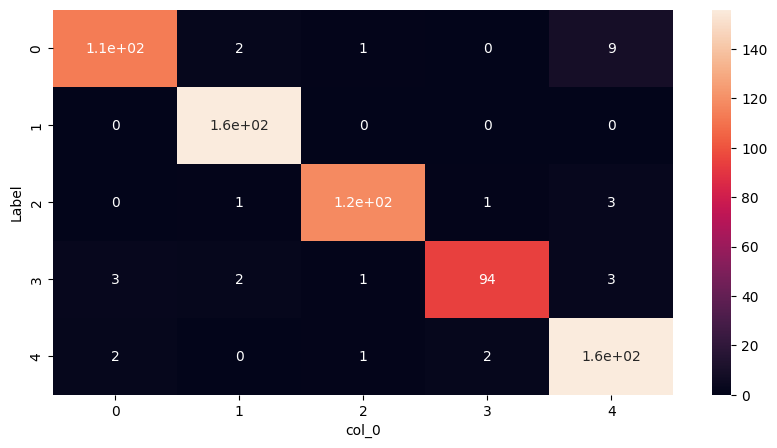

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)
sns.heatmap(pd.crosstab(ytest,y_pred),annot=True)
plt.show()